<a href="https://colab.research.google.com/github/JCaballerot/Deep_learning_program/blob/main/Deep_learning_program/Modulo_II/classCode_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN using Keras

In [1]:
# Import library

import tensorflow as tf
from tensorflow import keras as keras
from keras.datasets import mnist


In [46]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
y_train

In [ ]:
# Plotting images

import matplotlib.pyplot as plt
fig = plt.figure()

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])



In [8]:
# Categorize target
num_category = 10

y_train = keras.utils.to_categorical(y_train, num_classes = num_category)
y_test  = keras.utils.to_categorical(y_test,  num_classes = num_category)


In [ ]:
y_test

In [ ]:
X_train.shape

In [11]:
# Reshape input

img_rows = 28
img_cols = 28
chanels = 1

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, chanels)
X_test  = X_test.reshape( X_test.shape[0],  img_rows, img_cols, chanels)
input_shape = (img_rows, img_cols, chanels)


In [ ]:
# Scale data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)


In [30]:

# model Building

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), padding="valid", activation='relu', input_shape = input_shape))
model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), padding="valid", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_category, activation='softmax'))


In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

In [31]:
# Optimization

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(learning_rate = 0.1, rho = 0.05),
              metrics = ['accuracy'])



In [ ]:
batch_size = 10000
num_epoch = 100

early_stopping = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

#model training
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = num_epoch,
                    verbose = 1,
                    validation_data = (X_test, y_test),
                    callbacks = [early_stopping])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(16, 8))
plt.grid(True)
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-1] plt.show()

# GPU model using Keras

In [ ]:
import tensorflow as tf


In [35]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))


Number of devices: 1


In [36]:

# Open a strategy scope.
with strategy.scope():
  # Everything that creates variables should be under the strategy scope.
  # In general this is only model construction & `compile()`.
  model = keras.models.Sequential()

  model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), padding="valid", activation='relu', input_shape = input_shape))
  model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), padding="valid", activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(num_category, activation='softmax'))


In [37]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(learning_rate=0.1, rho = 0.05),
              metrics = ['accuracy'])

In [ ]:
batch_size = 2000
num_epoch = 500

early_stopping = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

#model training
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = num_epoch,
                    verbose = 1,
                    validation_data=(X_test, y_test),
                    callbacks = [early_stopping])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(16, 8))
plt.grid(True)
plt.gca().set_ylim(0, 0.4) # set the vertical range to [0-1] plt.show()

**Tarea**

In [47]:
from keras.datasets import fashion_mnist

In [ ]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape

In [ ]:
y_train

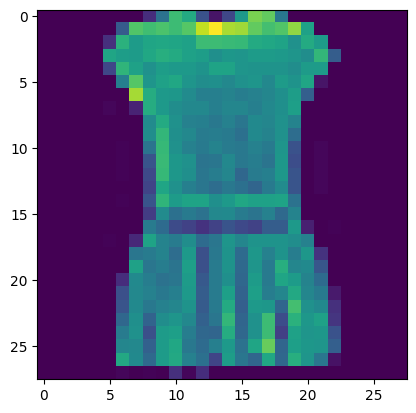

In [57]:
plt.imshow(X_train[3])